# Prediction

Now that we have removed the worst features and standardised the dataset, we can look at making a predictive classification model.

We will try many classification models and see which works best on our dataset.

Here are the models and a brief description of each:
- **Logistic Regression**: Uses a logistic function to predict the probability of an input belonging to a certain class, given its features. 

- **Linear Discriminant Analysis**: Uses linear combinations of features to project input data onto a lower-dimensional space where the classes can be more easily separated. 

- **K-Nearest Neighbors**: This model assigns a class label to an input based on the majority class of its k nearest neighbors in the training set. 

- **Decision Tree**: This classifier creates a tree-like model of decisions based on features of the input data, where each node represents a test on a specific feature and each leaf node represents a class label. 

- **Random Forest**: This model is an ensemble of decision trees that are trained on random subsets of the training data and features. It combines the predictions of these trees to produce a final prediction that is more robust and accurate than a single decision tree.

- **Support Vector Machine (SVC)**: This classifier constructs a hyperplane or set of hyperplanes in a high-dimensional space to separate the input data into different classes. 

- **Gaussian Naive Bayes**: This classifier is a variant of Naive Bayes that assumes a Gaussian distribution for the features, and it uses Bayes' theorem to predict the class label of an input based on its features.

- **eXtreme Gradient Boosting Machine (XGBM)**: This classifier is a variant of gradient boosting that uses a gradient descent algorithm to optimize a differentiable loss function. 

- **Light Gradient Boosting Machine (LGBM)**: This classifier is a variant of gradient boosting that uses a tree-based learning algorithm that is more efficient and scalable than traditional gradient boosting. 


I will use *K-fold cross-validation* to evaluate the performance of the models. This involves splitting the training data into k equally sized subsets, training and evaluating each model k times using each subset as the validation set once, and averaging the results to estimate the model's generalisation performance. This helps to prevent overfitting and select the best hyperparameters for the model.

Finally, I will use grid search to tune the hyperparameters. After this I will select and train the final predictive algorithm.


*Importing libraries and set-up:*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix


# algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from skopt.searchcv import BayesSearchCV
from skopt.space import Integer, Real, Categorical 
from skopt.utils import use_named_args
from skopt import gp_minimize


import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=UserWarning)


*import new dataset:*

In [2]:
df = pd.read_csv("credit_data_processed.csv")
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,num_dependents,foreign_worker,class
0,1,-1.320416,1,6,-0.851865,4,3,4,3,2,4,3,2.445612,1,1,2,1,1,1
1,0,2.065544,3,6,1.385029,2,0,2,0,2,2,3,-1.204794,1,1,1,1,1,0
2,3,-0.756089,1,2,-0.418239,2,1,2,3,2,3,3,1.259230,1,1,1,2,1,1
3,1,2.065544,3,3,2.235967,2,1,2,3,1,4,1,0.894190,1,0,1,2,1,1
4,1,0.372564,2,4,0.879365,2,0,3,3,2,4,2,1.624271,1,0,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2,0.372564,3,3,-0.045891,2,3,3,1,2,4,2,1.441751,1,0,1,1,1,1
794,3,0.372564,3,3,0.033630,1,3,4,3,2,3,2,-0.292193,1,2,1,1,1,1
795,3,-1.038253,3,3,-0.322345,0,2,2,0,2,4,1,-1.204794,1,2,1,1,1,1
796,1,-0.191763,3,9,2.114756,4,3,1,3,2,4,1,1.441751,1,0,1,2,1,0


In [3]:
#Creating the X and y variables
X = df.drop('class', axis=1) # predictors
y = df['class'] # target variable

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

LGR 	 mean score: 0.8770288651355387 	 standard deviation: 0.045754316193721785
LDA 	 mean score: 0.874473494149935 	 standard deviation: 0.053453593807436035
KNN 	 mean score: 0.8772269568427303 	 standard deviation: 0.059279125242564124
CART 	 mean score: 0.7678915691655833 	 standard deviation: 0.041902367676262084
RF 	 mean score: 0.8989188614441395 	 standard deviation: 0.045211365748672315
SVM 	 mean score: 0.9161779575328615 	 standard deviation: 0.027034227976716868
NB 	 mean score: 0.7443032083072528 	 standard deviation: 0.058411518112916054
XGBM 	 mean score: 0.858937077695925 	 standard deviation: 0.04131272670882016
LGBM 	 mean score: 0.8612300383584509 	 standard deviation: 0.03898648814970284


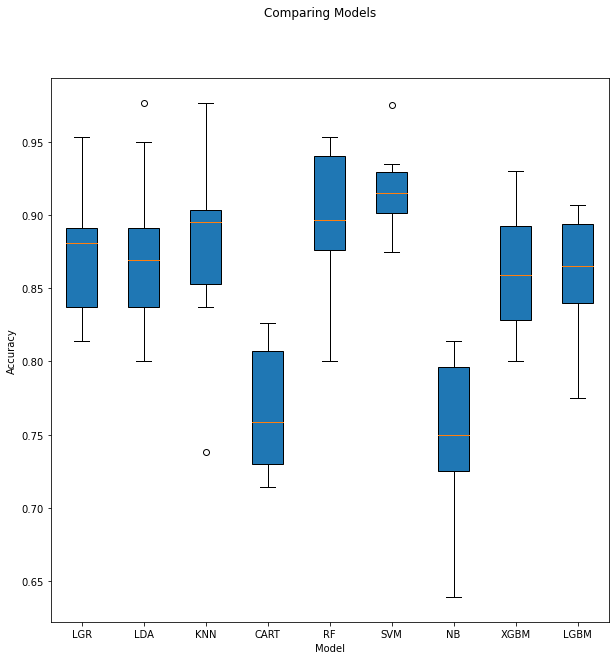

In [4]:
# prepare models
models = []
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NB', GaussianNB()))
models.append(('XGBM', XGBClassifier(verbosity = 0)))
models.append(('LGBM', LGBMClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=20, shuffle=False)
        cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cross_val_results)
        names.append(name)
        text = f"{name} \t mean score: {cross_val_results.mean()} \t standard deviation: {cross_val_results.std()}"
        print(text)
        
# boxplot to compare
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparing Models')
ax = fig.add_subplot()
# green_diamond = dict(markerfacecolor='g', marker='D')
# plt.boxplot(results, flierprops=green_diamond, patch_artist=True)
plt.boxplot(results, patch_artist=True)
plt.ylabel('Accuracy')
plt.xlabel('Model')

ax.set_xticklabels(names)
plt.show()

From the above, it appears that the following algorithms work the best:
- Random Forest Classifier 
- Support Vector Classifier 
- Logistic Regression


Now we will now tune the hyperparameters through optimisation.

**Random Forest Classifier**

We will tune these parameters using a grid search:
- n_estimators — The number of trees in the forest.
- max_depth — The maximum depth of the tree.
- criterion — The function to measure the quality of a split.

In [5]:
# before tuning
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)
print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")


Accuracy: 0.715
Confussion Matrix: 
 [[ 20  39]
 [ 18 123]] 



In [6]:
# define search space 
params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": (1, 9),
    "criterion": ["gini", "entropy"],
}
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

In [7]:
# Define grid search
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params, 
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)


# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': (1, 9),
                         'n_estimators': [100, 200, 300, 400]},
             refit='accuracy', scoring='accuracy')

In [8]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')

The best accuracy score for the training dataset is 0.7441
The best hyperparameters are {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 300}
The accuracy score for the testing dataset is 0.7000


In [21]:
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=9,)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")



Accuracy: 0.72
Confusion Matrix: 
 [[ 15  44]
 [ 12 129]] 



**C-Support Vector Classification**

We will tune these parameters using a grid search:
- C — The regularisation parameter
- gamma — The kernel coefficient
- kernel type — determines the mathematical function used to transform the input data into a higher-dimensional space where a linear decision boundary can be found to separate the classes.


In [10]:
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
# before tuning

# Run model
svc.fit(X_train, y_train)
# Accuracy score
print(f'The accuracy score of the model is {svc.score(X_test, y_test):.4f}')


The accuracy score of the model is 0.7300


In [12]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')


The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


In [13]:
# Define the search space
param_grid = { 
    "C": C_range, # Regularization parameter.
    "kernel": ['rbf', 'poly'], # Kernel type
    "gamma": gamma_range.tolist()+['scale', 'auto']  # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    }

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

In [14]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)


# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring='accuracy')

In [15]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')

The best accuracy score for the training dataset is 0.7475
The best hyperparameters are {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
The accuracy score for the testing dataset is 0.7100


In [22]:
svc = SVC(C=0.1, gamma='auto', kernel='poly')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")



Accuracy: 0.71
Confusion Matrix: 
 [[ 18  41]
 [ 17 124]] 



## Conclusion

**Training final model**

We will opt to use the Random Forest algorithm with the tuned hyperparameters. 

In [23]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=9,)
    
model.fit(X, y)
preds = model.predict(X)
accuracy = accuracy_score(y, preds)
print(f"Accuracy:", accuracy)
print("Confusion Matrix: \n", confusion_matrix(y, preds),"\n")



Accuracy: 0.9586466165413534
Confusion Matrix: 
 [[206  33]
 [  0 559]] 

